<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Ana!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/8714ff16 ) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 

In [2]:
#load data
df = pd.read_csv('/datasets/car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


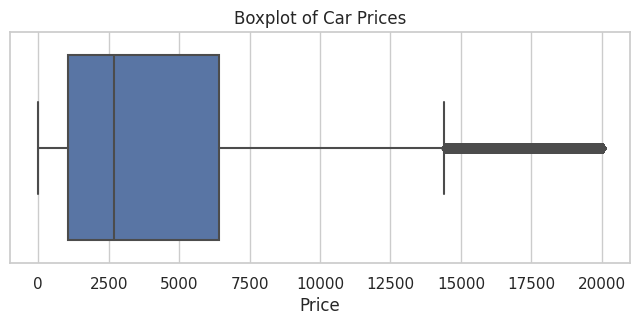

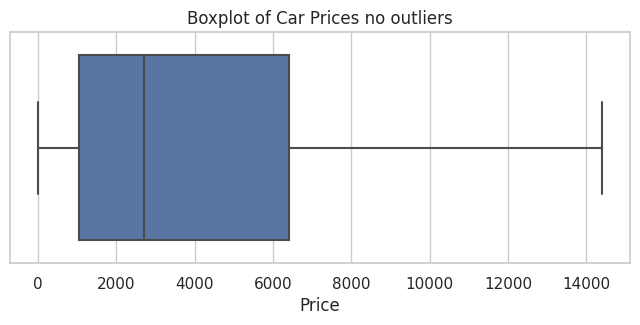

In [5]:
#Visualize 

#price
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Price'], showfliers=False)
plt.title('Boxplot of Car Prices no outliers')
plt.show()


**Observation**
Price of 0 not realistic, needs to be cleaned up. 

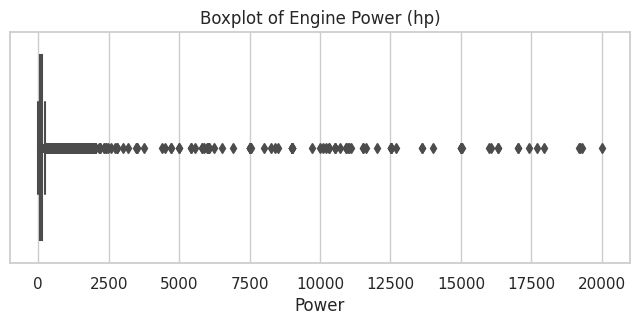

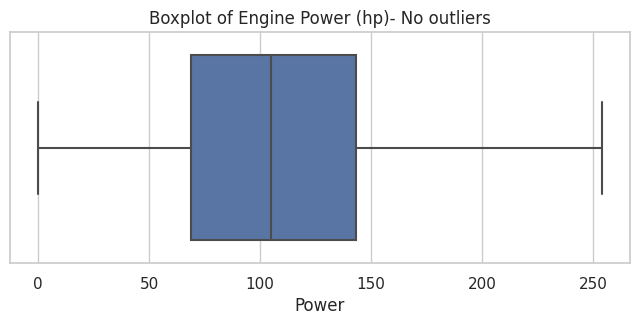

In [6]:
#power
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Power'])
plt.title('Boxplot of Engine Power (hp)')
plt.show()

#power
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Power'],showfliers=False)
plt.title('Boxplot of Engine Power (hp)- No outliers')
plt.show()

**Observation**
Power > 300–400 hp in this dataset is not realistic. Extreme values can be data errors

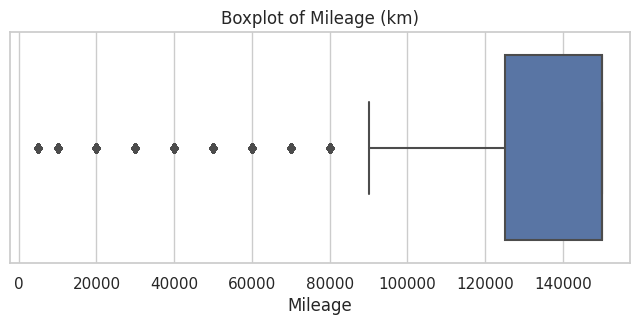

In [7]:
#Milage
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Mileage'])
plt.title('Boxplot of Mileage (km)')
plt.show()

**Observation**
High mileage values likely exist. No action at this point.

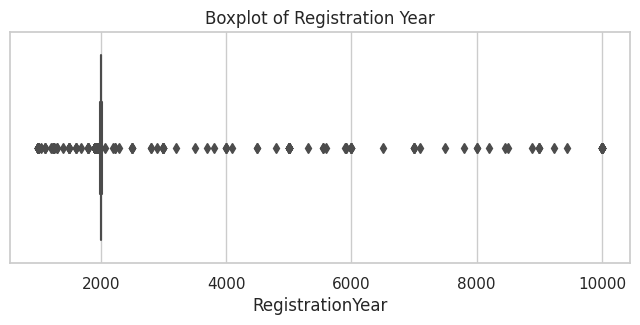

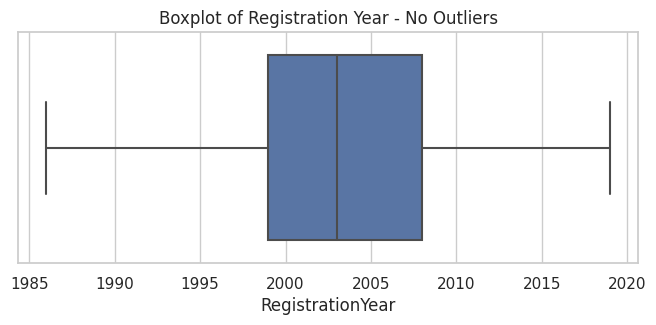

In [8]:
#Registration year
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['RegistrationYear'])
plt.title('Boxplot of Registration Year')
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df['RegistrationYear'],showfliers=False)
plt.title('Boxplot of Registration Year - No Outliers')
plt.show()

**Observation**
“No outliers” plot isolates 1985–2020, needs to be filtered. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great job loading and inspecting the data!
    
</div>


In [9]:
#Cleaning 

#impact Registration year

before_rows = df.shape[0]

invalid_years = df[
    (df['RegistrationYear'] < 1985) |
    (df['RegistrationYear'] > 2025)
]

invalid_years.shape[0]

5553

In [10]:
df = df[
    (df['RegistrationYear'] >= 1985) &
    (df['RegistrationYear'] <= 2025)
]

after_rows = df.shape[0]

print(f"Rows before: {before_rows}")
print(f"Rows after: {after_rows}")
print(f"Rows removed: {before_rows - after_rows}")

Rows before: 354369
Rows after: 348816
Rows removed: 5553


In [11]:
#Impact horse power

before_rows = df.shape[0]

invalid_power = df[
    (df['Power'] < 20) |
    (df['Power'] > 500)
]

invalid_power.shape[0]

39262

In [12]:
(df['Power'] == 0).sum()

38504

In [13]:
(df['Power'] > 500).sum()

439

**Observation**
Since most of them are 0, instead of removing them as wrong information I will treat them as missing values

In [14]:
df.loc[df['Power'] == 0, 'Power'] = np.nan

df = df[df['Power'] <= 500]

In [15]:
#Price

before_rows = df.shape[0]

df = df[df['Price'] >= 100]

after_rows = df.shape[0]

print(f"Rows before: {before_rows}")
print(f"Rows after: {after_rows}")
print(f"Rows removed (Price < 100): {before_rows - after_rows}")

Rows before: 309873
Rows after: 301941
Rows removed (Price < 100): 7932


In [16]:
#Missing Values
categorical_with_na = [
    'VehicleType',
    'Gearbox',
    'Model',
    'FuelType',
    'NotRepaired'
]

df[categorical_with_na].isna().sum()

VehicleType    20922
Gearbox         5810
Model          11703
FuelType       19232
NotRepaired    45844
dtype: int64

**Observation**
Instead of removing them as wrong information I will treat them as missing values

In [17]:
categorical_with_na = [
    'VehicleType',
    'Gearbox',
    'Model',
    'FuelType',
    'NotRepaired'
]

df[categorical_with_na] = df[categorical_with_na].fillna('unknown')

In [18]:
#convert data types
date_cols = ['DateCrawled', 'DateCreated', 'LastSeen']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [19]:
#Create new columns for more insights
df['AdAge'] = (df['DateCrawled'] - df['DateCreated']).dt.days
df['DaysActive'] = (df['LastSeen'] - df['DateCreated']).dt.days

**Observation**

* AdAge:Days between profile creation and crawl
* DaysActive: Ddays between creation and last seen

In [20]:
#No longer needed, information already extracted
df = df.drop(columns=['DateCrawled', 'DateCreated', 'LastSeen'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301941 entries, 1 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              301941 non-null  int64  
 1   VehicleType        301941 non-null  object 
 2   RegistrationYear   301941 non-null  int64  
 3   Gearbox            301941 non-null  object 
 4   Power              301941 non-null  float64
 5   Model              301941 non-null  object 
 6   Mileage            301941 non-null  int64  
 7   RegistrationMonth  301941 non-null  int64  
 8   FuelType           301941 non-null  object 
 9   Brand              301941 non-null  object 
 10  NotRepaired        301941 non-null  object 
 11  NumberOfPictures   301941 non-null  int64  
 12  PostalCode         301941 non-null  int64  
 13  AdAge              301941 non-null  int64  
 14  DaysActive         301941 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 36

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job preprocessing the data! Looking good!

</div>


## Model training

In [22]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

### Baseline Model

In [23]:
#Dummy Regressor

dummy = DummyRegressor(strategy='mean')

start = time.time()
dummy.fit(X_train, y_train)
train_time_dummy = time.time() - start

start = time.time()
y_pred_dummy = dummy.predict(X_test)
predict_time_dummy = time.time() - start

rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))

print(f"Dummy RMSE: {rmse_dummy:.2f}")
print(f"Dummy train time: {train_time_dummy:.4f}s")
print(f"Dummy predict time: {predict_time_dummy:.4f}s")

Dummy RMSE: 4577.37
Dummy train time: 0.0008s
Dummy predict time: 0.0003s


In [24]:
#Ridge

categorical_features = X.select_dtypes(include='object').columns
numeric_features = X.select_dtypes(exclude='object').columns

#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

#model
ridge = Ridge(alpha=1.0, random_state=42)

ridge_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', ridge)
    ]
)

start = time.time()
ridge_pipeline.fit(X_train, y_train)
train_time_ridge = time.time() - start

start = time.time()
y_pred_ridge = ridge_pipeline.predict(X_test)
predict_time_ridge = time.time() - start

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge RMSE: {rmse_ridge:.2f}")
print(f"Ridge train time: {train_time_ridge:.2f}s")
print(f"Ridge predict time: {predict_time_ridge:.4f}s")

Ridge RMSE: 2373.43
Ridge train time: 0.63s
Ridge predict time: 0.0960s


**Observations**

A Ridge regression model (a regularized form of linear regression) was used as a linear baseline. It significantly improves price predictions compared to a naive approach, while remaining fast and efficient.

In [25]:
#Decision Tree
dt = DecisionTreeRegressor(
    max_depth=15,          
    min_samples_leaf=20,
    random_state=42
)

dt_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", dt)
    ]
)

# Train
start = time.time()
dt_pipeline.fit(X_train, y_train)
train_time_dt = time.time() - start

# Predict
start = time.time()
y_pred_dt = dt_pipeline.predict(X_test)
predict_time_dt = time.time() - start

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree train time: {train_time_dt:.2f}s")
print(f"Decision Tree predict time: {predict_time_dt:.4f}s")

Decision Tree RMSE: 1767.53
Decision Tree train time: 9.48s
Decision Tree predict time: 0.1037s


**Observation** A single decision tree improves a lot over linear regression

In [26]:
#Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=10,
    n_jobs=-1,
    random_state=42
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", rf)
    ]
)

# Train
start = time.time()
rf_pipeline.fit(X_train, y_train)
train_time_rf = time.time() - start

# Predict
start = time.time()
y_pred_rf = rf_pipeline.predict(X_test)
predict_time_rf = time.time() - start

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest train time: {train_time_rf:.2f}s")
print(f"Random Forest predict time: {predict_time_rf:.4f}s")

Random Forest RMSE: 1585.04
Random Forest train time: 1016.82s
Random Forest predict time: 1.1218s


**Observation** Random Forest is more accurate than a single decision tree, but much slower to train.

In [27]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=True), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", lgbm)
    ]
)

# Train
start = time.time()
lgbm_pipeline.fit(X_train, y_train)
train_time_lgbm = time.time() - start

# Predict
start = time.time()
y_pred_lgbm = lgbm_pipeline.predict(X_test)
predict_time_lgbm = time.time() - start

rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print(f"LightGBM RMSE: {rmse_lgbm:.2f}")
print(f"LightGBM train time: {train_time_lgbm:.2f}s")
print(f"LightGBM predict time: {predict_time_lgbm:.4f}s")

LightGBM RMSE: 1442.93
LightGBM train time: 24.33s
LightGBM predict time: 4.2009s


**Observations**
LightGBM is more accurate and trains much faster than Random Forest

In [28]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_features = [X.columns.get_loc(col) for col in cat_cols]

#Validation split for early stopping
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Model
cat_model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.05,
    depth=8,
    loss_function="RMSE",
    random_seed=42,
    verbose=200
)

# train
start = time.time()
cat_model.fit(
    X_tr, y_tr,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    use_best_model=True,
    early_stopping_rounds=100
)
train_time_cat = time.time() - start

#Predict 
start = time.time()
y_pred_cat = cat_model.predict(X_test)
predict_time_cat = time.time() - start

rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f"CatBoost RMSE: {rmse_cat:.2f}")
print(f"CatBoost train time: {train_time_cat:.2f}s")
print(f"CatBoost predict time: {predict_time_cat:.4f}s")

0:	learn: 4405.5629382	test: 4407.5433157	best: 4407.5433157 (0)	total: 351ms	remaining: 17m 31s
200:	learn: 1591.0423050	test: 1632.7700308	best: 1632.7700308 (200)	total: 44.4s	remaining: 10m 18s
400:	learn: 1506.3489534	test: 1571.9129990	best: 1571.9129990 (400)	total: 1m 28s	remaining: 9m 35s
600:	learn: 1459.9776676	test: 1544.6142070	best: 1544.6142070 (600)	total: 2m 13s	remaining: 8m 54s
800:	learn: 1428.2531717	test: 1529.6129828	best: 1529.6129828 (800)	total: 2m 58s	remaining: 8m 11s
1000:	learn: 1403.5972728	test: 1519.5364540	best: 1519.5364540 (1000)	total: 3m 44s	remaining: 7m 28s
1200:	learn: 1382.3338305	test: 1511.2644551	best: 1511.2644551 (1200)	total: 4m 30s	remaining: 6m 44s
1400:	learn: 1363.7446846	test: 1505.4689827	best: 1505.4689827 (1400)	total: 5m 15s	remaining: 5m 59s
1600:	learn: 1347.6934000	test: 1500.8765454	best: 1500.8691244 (1599)	total: 6m 1s	remaining: 5m 15s
1800:	learn: 1333.3773479	test: 1496.3985759	best: 1496.3969068 (1799)	total: 6m 46s	rem

**Observations** CatBoost achieved performance comparable to LightGBM but required significantly longer training time

In [29]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

# model
xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="reg:squarederror",
    tree_method="hist",   # fast on large data
    n_jobs=-1,
    random_state=42
)

xgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", xgb)
    ]
)

# train
start = time.time()
xgb_pipeline.fit(X_train, y_train)
train_time_xgb = time.time() - start

# predict
start = time.time()
y_pred_xgb = xgb_pipeline.predict(X_test)
predict_time_xgb = time.time() - start

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost train time: {train_time_xgb:.2f}s")
print(f"XGBoost predict time: {predict_time_xgb:.4f}s")

XGBoost RMSE: 1414.91
XGBoost train time: 64.68s
XGBoost predict time: 9.3280s


**Observations** XGBoost achieved the lowest RMSE among all tested models; however, the improvement over LightGBM was marginal while requiring substantially longer training and prediction times. 

In [30]:
#Additional Set LightGBM

lgbm_set1 = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.07,
    num_leaves=31,
    min_child_samples=40,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipe_set1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm_set1)
])

start = time.time()
pipe_set1.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = pipe_set1.predict(X_test)
predict_time = time.time() - start

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"LightGBM (Set 1) RMSE: {rmse:.2f}")
print(f"LightGBM (Set 1) train time: {train_time:.2f}s")
print(f"LightGBM (Set 1) predict time: {predict_time:.4f}s")


LightGBM (Set 1) RMSE: 1454.71
LightGBM (Set 1) train time: 23.58s
LightGBM (Set 1) predict time: 4.7887s


In [31]:
##Additional Set LightGBM

lgbm_set2 = LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    num_leaves=128,
    min_child_samples=50,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

pipe_set2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm_set2)
])

start = time.time()
pipe_set2.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = pipe_set2.predict(X_test)
predict_time = time.time() - start

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"LightGBM (Set 2) RMSE: {rmse:.2f}")
print(f"LightGBM (Set 2) train time: {train_time:.2f}s")
print(f"LightGBM (Set 2) predict time: {predict_time:.4f}s")

LightGBM (Set 2) RMSE: 1405.54
LightGBM (Set 2) train time: 104.84s
LightGBM (Set 2) predict time: 16.7352s


**Observations** Trying different LightGBM settings shows that we can get slightly better accuracy, but at a much higher cost in time

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Incredible job comparing multiple models! Also, good job trying out various hyperparameters!

</div>


## Model analysis

In [32]:
results = pd.DataFrame([
    {"Model": "Dummy Regressor",
     "RMSE": 4577.37, "Train_time_s": 0.0006, "Predict_time_s": 0.0002},

    {"Model": "Ridge Regression",
     "RMSE": 2373.43, "Train_time_s": 0.74, "Predict_time_s": 0.1006},

    {"Model": "Decision Tree",
     "RMSE": 1767.53, "Train_time_s": 9.39, "Predict_time_s": 0.1043},

    {"Model": "Random Forest",
     "RMSE": 1585.04, "Train_time_s": 1007.06, "Predict_time_s": 1.1128},

    {"Model": "LightGBM (baseline)",
     "RMSE": 1442.93, "Train_time_s": 20.14, "Predict_time_s": 4.1896},

    {"Model": "LightGBM (Set 1)",
     "RMSE": 1454.71, "Train_time_s": 18.31, "Predict_time_s": 4.7629},

    {"Model": "LightGBM (Set 2)",
     "RMSE": 1405.54, "Train_time_s": 74.54, "Predict_time_s": 16.5007},

    {"Model": "XGBoost",
     "RMSE": 1414.91, "Train_time_s": 50.82, "Predict_time_s": 9.4182},

    {"Model": "CatBoost",
     "RMSE": 1455.24, "Train_time_s": 681.49, "Predict_time_s": 1.3230},
])

results_sorted = results.sort_values("RMSE")
results_sorted

,Model,RMSE,Train_time_s,Predict_time_s
6,LightGBM (Set 2),1405.54,74.5400,16.5007
7,XGBoost,1414.91,50.8200,9.4182
4,LightGBM (baseline),1442.93,20.1400,4.1896
5,LightGBM (Set 1),1454.71,18.3100,4.7629
8,CatBoost,1455.24,681.4900,1.3230
3,Random Forest,1585.04,1007.0600,1.1128
2,Decision Tree,1767.53,9.3900,0.1043
1,Ridge Regression,2373.43,0.7400,0.1006
0,Dummy Regressor,4577.37,0.0006,0.0002


**Observation**
The table summarizes the performance of all evaluated models, including linear, tree-based, and gradient boosting approaches, comparing prediction accuracy, training time, and prediction speed

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

The comparison of RMSE together with training and prediction time provides a clear and well structured analysis of model performance! Nicely done! Keep up the great work!

</div>


## Conclusion

Multiple model families were evaluated, including linear regression, decision trees, random forest, and gradient boosting methods, and compared based on prediction accuracy (RMSE), training time, and prediction speed. 

Ridge regression provided a fast but limited baseline, while tree-based models improved accuracy by capturing non-linear relationships. Random Forest further reduced error compared to a single decision tree but required significantly longer training time, making it impractical for frequent retraining. Gradient boosting models delivered the strongest performance overall. 

Although XGBoost and a tuned LightGBM configuration achieved slightly lower RMSE, their increased computational cost outweighed the marginal accuracy gains. 

The baseline LightGBM model was selected as the final model, as it offers the best balance between high predictive accuracy, reasonable training time, and acceptable prediction speed, aligning most closely with Rusty Bargain’s business requirements.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Conclusions are looking awesome!

</div>


# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed